# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import sklearn

sb.set()
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv("real_estate_price_size.csv")

In [3]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [4]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [5]:
data.corr()

,price,size
price,1.000000,0.862983
size,0.862983,1.000000


## Create the regression

### Declare the dependent and the independent variables

In [6]:
x = data['size']
y = data['price']

### Explore the data

In [7]:
x.shape

(100,)

In [8]:
y.shape

(100,)

### Transform the inputs into a matrix (2D object)

In [9]:
x_matrix = x.values.reshape(-1,1)

In [10]:
x_matrix.shape

(100, 1)

### Regression itself

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(x_matrix,y)
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Calculate the R-squared

In [13]:
reg.score(x_matrix,y)

0.7447391865847586

### Find the intercept

In [14]:
reg.intercept_

101912.60180122897

### Find the coefficients

In [15]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [16]:
reg.predict([[750]])

array([269296.65874718])

In [17]:
new_data = pd.DataFrame(data=[745,790], columns=['size'])
new_data

,size
0,745
1,790


In [19]:
new_data['Predicted Price'] = reg.predict(new_data)
new_data

C:\Users\42128\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,size,Predicted Price
0,745,268180.765034
1,790,278223.808451


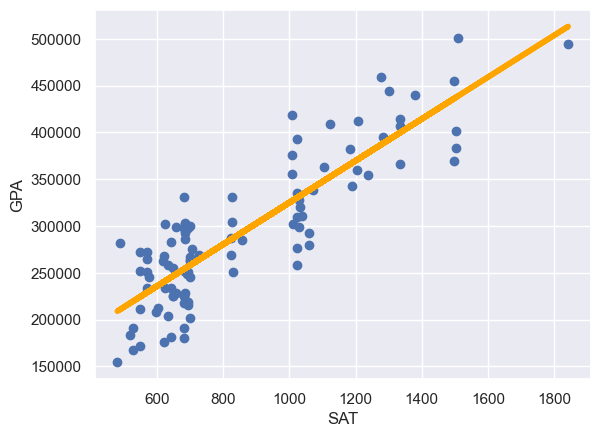

In [24]:
plt.scatter(x, y)
yhat = reg.intercept_ + reg.coef_*x_matrix
plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()